In [27]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

In [28]:
# theoretical price and delta for binary option
def d_plus(sigma,T,t,S,K,r):
    return 1./(sigma*np.sqrt(T-t))*(np.log(S/K)+(r+sigma*sigma/2.)*(T-t))
    
def d_minus(sigma,T,t,S,K,r):
    return d_plus(sigma,T,t,S,K,r) - sigma*np.sqrt(T-t)

def C0(S,K,T,r,sigma):
    return np.exp(-r*T)*sts.norm.cdf(-d_minus(sigma,T,0,S,K,r))

def Delta0(S,K,T,r,sigma):
    return -np.exp(-r*T)/(S*sigma*np.sqrt(T))*sts.norm.pdf(-d_minus(sigma,T,0,S,K,r))

In [29]:
r = 0.02
sigma0 = 0.4
S0 = 100
T = 0.9
K = 80 + np.arange(0,41)
N = 100000

In [30]:
# Simulation of C, with Z a vector of random normal variables
def C_simulation(S,K,T,r,sigma, Z):
    B_T = Z*np.sqrt(T)
    S_T = S*np.exp((r-0.5*sigma*sigma)*T+sigma*B_T)
    indicator = (S_T <= K)
    C = np.exp(-r*T)* np.mean(indicator)
    return C


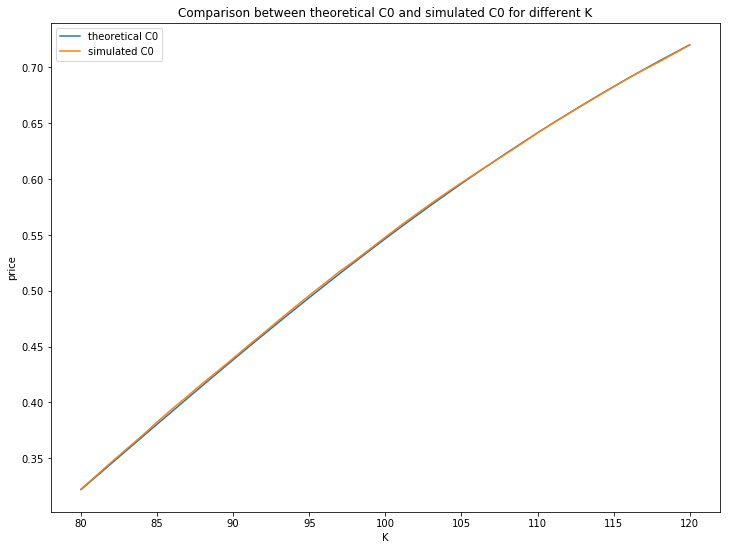

In [31]:
Z = np.random.randn(N)
C_theory = [C0(S0,k,T,r,sigma0) for k in K]
C_sim = [C_simulation(S0,k,T,r,sigma0, Z) for k in K]

plt.figure(figsize=(12,9))
plt.plot(K, C_theory, label = "theoretical C0")
plt.plot(K, C_sim, label = "simulated C0")
plt.legend(loc ="best")
plt.title("Comparison between theoretical C0 and simulated C0 for different K")
plt.xlabel("K")
plt.ylabel("price")
plt.show()

# Conclusion
The price calculated by simulations corresponds to the theoretical prices very well.

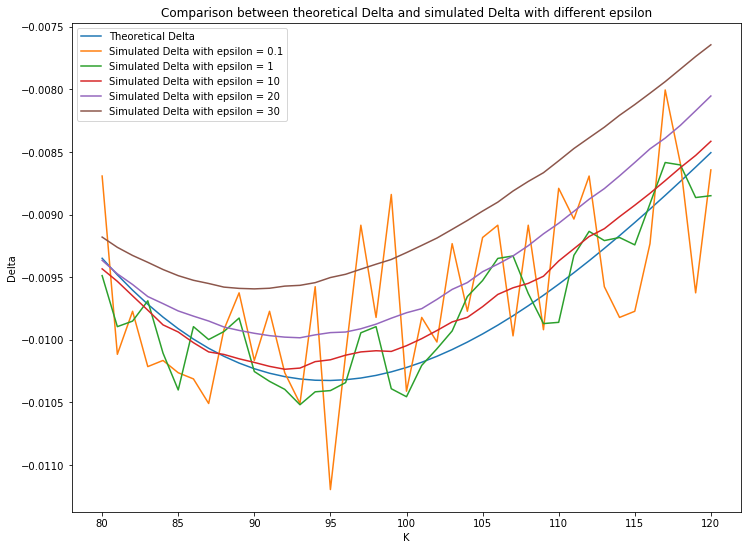

In [32]:
def Delta_fini_diff(S,K,T,r,sigma, Z, epsilon):
    C_plus = C_simulation(S+epsilon,K,T,r,sigma, Z)
    C_minus = C_simulation(S-epsilon,K,T,r,sigma, Z)
    return (C_plus - C_minus)/(2.*epsilon)

epsi = [0.1, 1,10,20, 30]
Delta_theo = [Delta0(S0,k,T,r,sigma0) for k in K]
Delta_epsi = []
for i in range(len(epsi)):
    Delta_epsi.append([Delta_fini_diff(S0,k,T,r,sigma0, Z, epsi[i]) for k in K])

plt.figure(figsize=(12,9))
plt.plot(K,Delta_theo, label = "Theoretical Delta")
for i in range(len(epsi)):
    plt.plot(K,Delta_epsi[i], label = "Simulated Delta with epsilon = {}".format(epsi[i]))
plt.legend(loc ="best")
plt.title("Comparison between theoretical Delta and simulated Delta with different epsilon")
plt.xlabel("K")
plt.ylabel("Delta")
plt.show()
        

# Conclusion
As we can see from the figure, the finite difference does not work well for very small epsilon. The numerical results are not stable for epsilon smaller than 10. The optimal epsilon is around 1 to 10, as the curve is very close to the theoretical value. When epsilon is greater than 20, the difference starts increasing, thus the result is worse.

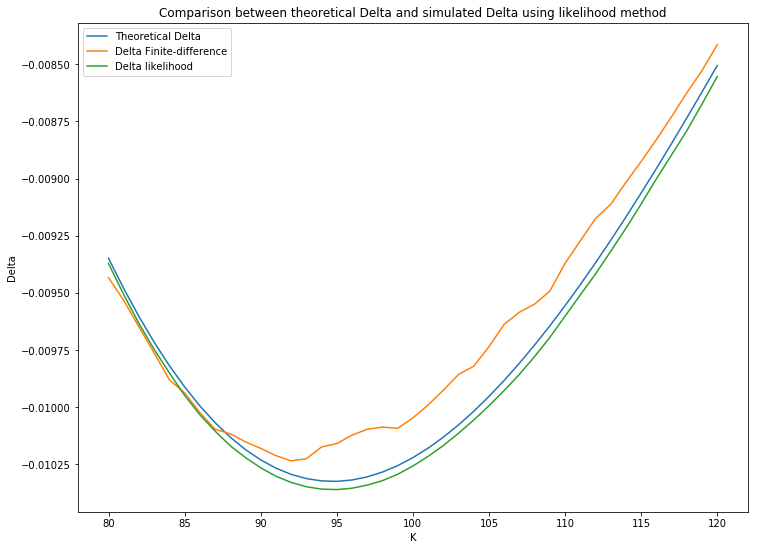

In [33]:
def Delta_likelihood(S,K,T,r,sigma,Z):
    B_T = Z*np.sqrt(T)
    S_T = S0*np.exp((r-0.5*sigma*sigma)*T+sigma*B_T)
    indicator = (S_T <= K)
    delta = np.exp(-r*T)* np.mean(indicator * B_T/(S*sigma*T))
    return delta

Delta_lh = [Delta_likelihood(S0,k,T,r,sigma0,Z) for k in K]
plt.figure(figsize=(12,9))
plt.plot(K,Delta_theo, label = "Theoretical Delta")
plt.plot(K,Delta_epsi[-3], label = "Delta Finite-difference")
plt.plot(K,Delta_lh, label = "Delta likelihood")
plt.legend(loc ="best")
plt.title("Comparison between theoretical Delta and simulated Delta using likelihood method")
plt.xlabel("K")
plt.ylabel("Delta")
plt.show()


# Conclusion

Comparing with the finite-difference method, the likelihood method produces a smoother curce, and the result is very close to theoretical value. Thus, the delta simulated using likelihood method corresponds to the theoretical value very well. With N increase, the difference between simulated value and theoretical value will be smaller. 

The finite difference method works better for very small and very large strike values, and works worse for intermediate strike values.